Define build_model and train_model
Defined the plot_the_model and plot_the_loss_curve functions.
Epoch 1/500


/home/kelvinnr/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step - loss: 214.4426 - root_mean_squared_error: 14.6439
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 177.9949 - root_mean_squared_error: 13.3415
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 154.7521 - root_mean_squared_error: 12.4399
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 137.0751 - root_mean_squared_error: 11.7079
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 122.6375 - root_mean_squared_error: 11.0742
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 110.3811 - root_mean_squared_error: 10.5062
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 99.7236 - root_mean_squared_error: 9.9862
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 90.3058 - root_mean_squared_error: 9.5029
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 81.8882 - root_mean_squared_error: 9.0492
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 74.3023 - root_mean_squared_error: 8.619

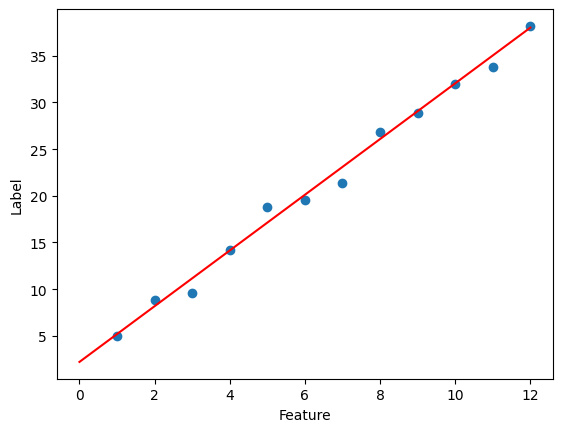

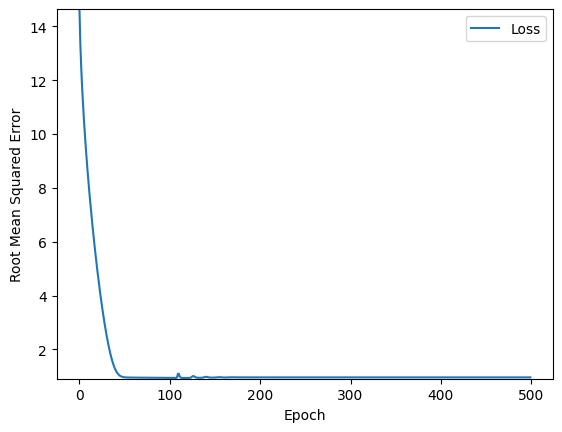

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Define functions that build and train a model
def build_model(my_learning_rate):
    '''Create and compile a simple linear regression model'''
    # Most simple tf.keras models are sequential
    # A sequential model contains one or more layers.
    model = tf.keras.models.Sequential()
    
    # Describe the topography of the model.
    # The topography of a simple linear regression model
    # is a single node in a single layer
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))
    
    # Compile the model topography into code that
    # Tensorflow can efficiently execute. Configure
    # training to minimize the model's mean squared error
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate), 
                  loss='mean_squared_error', 
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

def train_model(model, feature, label, epochs, batch_size):
    """Train the model by feeding it data"""
    # Feed the feature values and the label values to the model.
    # The model will train for the specified number of epochs,
    # gradually learning how the feature values relate to the label values.
    history = model.fit(
        x=feature,
        y=label,
        batch_size=batch_size,
        epochs=epochs
    )
    # Gather the trained model's weight and bias.
    trained_weight = model.get_weights()[0][0]
    trained_bias = model.get_weights()[1]

    # The list of epochs is stored separately from the rest of history
    epochs = history.epoch

    # Gather the history (a snapshot) of each epoch.
    hist = pd.DataFrame(history.history)

    # Specifically gather the model's root mean squared error at each epoch
    rmse = hist["root_mean_squared_error"]

    return trained_weight, trained_bias, epochs, rmse

print("Define build_model and train_model")

def plot_the_model(trained_weight, trained_bias, feature, label):
    '''Plot the model against the training feature and label.'''

    # Label the axes
    plt.xlabel('Feature')
    plt.ylabel('Label')

    # Plot the feature values vs. label values.
    plt.scatter(feature, label)

    # Create a red line representing the model. The red line starts
    # at coordinates (x0, y0) and ends at coordinates (x1, y1)
    x0 = 0
    y0 = trained_bias
    x1 = feature[-1]
    y1 = trained_bias + (trained_weight * x1)
    plt.plot([x0, x1], [y0, y1], c='r')

    # Render the scatter plot and the red line.
    plt.show()

def plot_the_loss_curve(epochs, rmse):
    """Plot the loss curve, which shows the loss vs. epoch."""

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")

    plt.plot(epochs, rmse, label="Loss")
    plt.legend()
    plt.ylim([rmse.min()*0.97, rmse.max()])
    plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

my_feature = np.array([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label = np.array([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

learning_rate = 0.05 # floating point number
epochs = 500 # this is an integer
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)
